In [1]:
from cpclasses import *

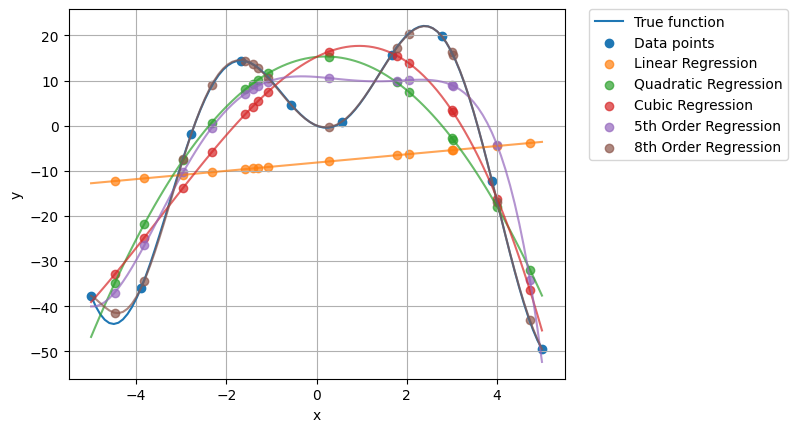

In [2]:
def non_trivial_function(x):
    return 10*np.cos(x - 2) * x

x_min = -5
x_max = 5

xs = np.linspace(x_min, x_max, 10).astype(float)
ys = non_trivial_function(xs)

xs_linspace = np.linspace(x_min, x_max, 100)


fig, ax = plt.subplots()
ax.plot(xs_linspace, non_trivial_function(xs_linspace), label='True function')
ax.scatter(xs, ys, label='Data points')

x_samples = np.random.uniform(x_min, x_max, 15)

orders = [1, 2, 3, 5, 8]
colors = ['C1', 'C2', 'C3', 'C4', 'C5']
for order, color in zip(orders, colors):
    PR = PolynomialRegression(xs, ys, order = order, x_range = [x_min, x_max])
    PR.plot(ax, x_samples=x_samples, solid_line=True, color=color, alpha = 0.7)



ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

def update(i):
    ax.clear()
    ax.plot(xs_linspace, non_trivial_function(xs_linspace), label='True function')
    ax.scatter(xs, ys, label='Data points')
    idx = i
    PR = PolynomialRegression(xs, ys, order = idx, x_range = [x_min, x_max])
    PR.plot(ax, x_samples=x_samples, solid_line=True, color=f'C{idx}', alpha = 0.7)
    ax.legend(loc='upper left', borderaxespad=0.)
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set(xlim=(-2, 12), ylim=(-60, 80))

#ani = FuncAnimation(fig, update, frames=np.arange(0, 20), repeat=False)
#ani.save('Figures/polynomial_regression.gif', writer='imagemagick', fps=1.5)

In [3]:
#Check that the matrix is invertible
PR = PolynomialRegression(xs, ys, order = 10, x_range = [0, 9])

result = np.linalg.inv(PR.X.T @ PR.X) @ (PR.X.T @ PR.X)

#print(result.round())

result

array([[ 9.35077895e-01,  7.36339872e-10, -1.65496822e+00,
         1.62982676e-08, -4.17178669e+01,  3.80641180e-07,
        -1.04751552e+03,  9.14443331e-06, -2.62723242e+04,
         2.23270911e-04, -6.57650271e+05],
       [-3.36144822e-11,  1.00000000e+00, -7.66685926e-10,
         2.79930131e-09, -1.79858223e-08,  6.46829829e-08,
        -4.32201882e-07,  1.53466600e-06, -1.06453841e-05,
         3.78066537e-05, -2.64740588e-04],
       [-1.91276772e-02, -1.00521271e-10,  5.70745463e-01,
        -2.30332560e-09, -1.03188846e+01, -5.46614425e-08,
        -2.52419858e+02, -1.32564204e-06, -6.12681341e+03,
        -3.26786641e-05, -1.50111195e+05],
       [ 3.08812332e-12, -1.20349998e-11,  6.91633750e-11,
         1.00000000e+00,  1.59431299e-09, -5.90132417e-09,
         3.72090626e-08, -1.35786062e-07,  9.46128473e-07,
        -3.98589493e-06,  2.40496359e-05],
       [ 2.07295542e-03,  4.91105756e-12,  4.80779988e-02,
         1.14574515e-10,  2.17458934e+00,  2.64489858e-09,
  

[(-5.0, 5.0), (-20.0, 40.0)]

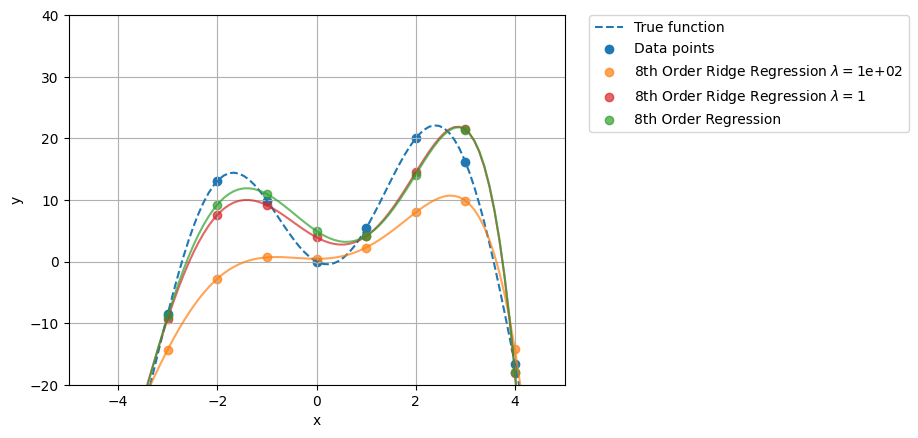

In [4]:
order = 8
xs = np.arange(x_min, x_max) 
ys = non_trivial_function(xs)
lmb = 1e2
xs_linspace = np.linspace(x_min, x_max, 100)
RR = RidgeRegression(xs, ys, order = order, lmb=1e2, x_range = [x_min, x_max])
PR = PolynomialRegression(xs, ys, order = order, x_range = [x_min, x_max])
RR2 = RidgeRegression(xs, ys, order = order, lmb=1e0, x_range = [x_min, x_max])

fig, ax = plt.subplots()

ax.plot(xs_linspace, non_trivial_function(xs_linspace), '--', label='True function')
ax.scatter(xs, ys, label='Data points')


RR.plot(ax, x_samples=xs, solid_line=True, color='C1', alpha = 0.7)
RR2.plot(x_samples=xs, ax = ax, solid_line=True, color='C3', alpha = 0.7)

PR.plot(ax, x_samples=xs, solid_line=True, color='C2', alpha = 0.7)

ax.legend(loc='upper left', borderaxespad=0., bbox_to_anchor=(1.05, 1))
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set(xlim=(-5, 5), ylim=(-20, 40))



In [5]:
from sklearn.linear_model import Ridge
n_samples, n_feaurtes = 10, 5

xs_sk = np.random.uniform(0, 10, n_samples)
ys_sk = non_trivial_function(xs) + np.random.normal(0, 1, n_samples)
RR = RidgeRegression(xs, ys, order = 6)

RR.regression()

clf = Ridge(alpha=100)
clf.fit(RR.X, ys)
print(clf.coef_)
print(RR.betas)

[ 0.         -0.0019454   0.47640668  0.80861718 -0.20203451 -0.04172745
  0.00227456]
[ 1.56933042 -0.75854807  3.94245887  1.00618391 -0.49304342 -0.05026045
  0.00861936]


# Data with Noise

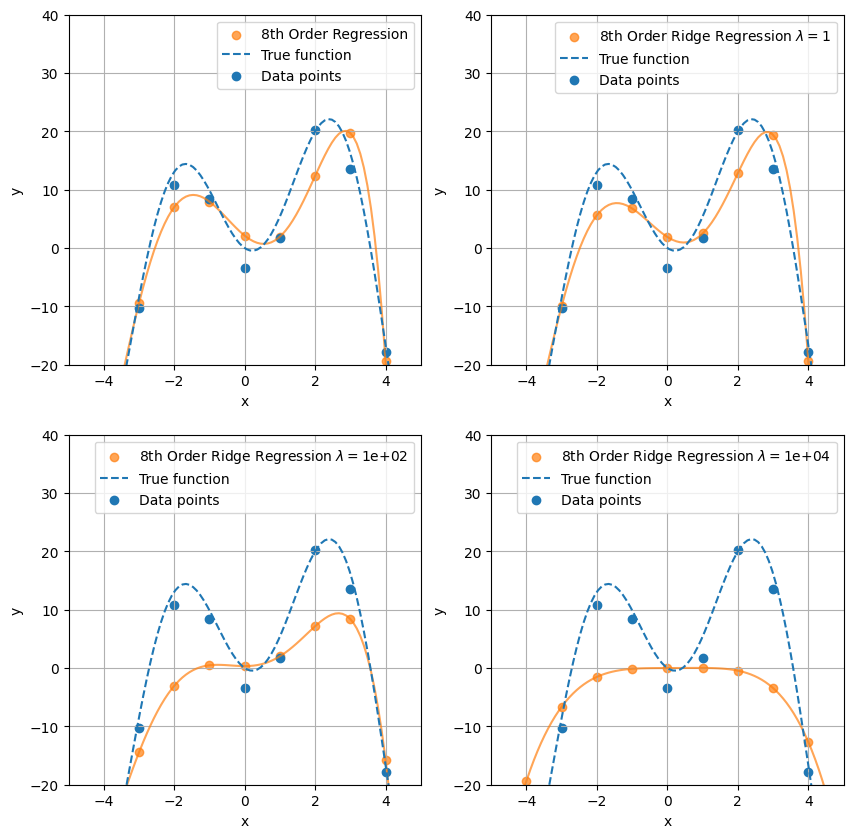

In [6]:
sigma = 1
ys_noised = ys + 2* np.random.normal(0, sigma**2, n_samples)

PR = PolynomialRegression(xs, ys_noised, order = 8, x_range = [x_min, x_max])

RR1 = RidgeRegression(xs, ys_noised, order = 8, lmb=1e0, x_range = [x_min, x_max])
RR2 = RidgeRegression(xs, ys_noised, order = 8, lmb=1e2, x_range = [x_min, x_max])
RR3 = RidgeRegression(xs, ys_noised, order = 8, lmb=1e4, x_range = [x_min, x_max])

fig, axs = plt.subplots(2,2, figsize=(10, 10))

#Plot the true function and the data points
ax.plot(xs_linspace, non_trivial_function(xs_linspace),'--', label='True function')
ax.scatter(xs, ys_noised, label='Data points')

#Plot the polynomial regression

for ax, reg in zip(axs.flatten(), [PR, RR1, RR2, RR3]):
    reg.plot(ax, x_samples=xs, solid_line=True, alpha = 0.7)
    ax.plot(xs_linspace, non_trivial_function(xs_linspace),'--', label='True function')
    ax.scatter(xs, ys_noised, label='Data points')
    ax.legend()
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set(xlim=(-5, 5), ylim=(-20, 40))

# PR.plot(ax, x_samples=xs, solid_line=True, color='C2', alpha = 0.7)
# RR.plot(ax, x_samples=xs, solid_line=True, color='C1', alpha = 0.7)
# RR2.plot(ax, x_samples=xs, solid_line=True, color='C3', alpha = 0.7)



save_plot(fig, 'ridge_regression.png')